<a href="https://colab.research.google.com/github/aarati0122/Image-Classification/blob/main/ImageClassification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 3.47 ms (started: 2021-04-27 15:18:26 +00:00)


In [2]:
!pip install bing-image-downloader

time: 3.13 s (started: 2021-04-27 15:18:26 +00:00)


In [3]:
# from bing_image_downloader import downloader
# downloader.download("bicycles", limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

time: 857 µs (started: 2021-04-27 15:18:29 +00:00)


In [4]:
# Preprocessing
# use flatten - to convert matrix into vector

time: 673 µs (started: 2021-04-27 15:18:29 +00:00)


In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize 

time: 1.09 s (started: 2021-04-27 15:18:29 +00:00)


In [6]:
target=[]
images = []
flatten_data =[]

DATADIR = '/content/drive/MyDrive/ML Internship SmartKnower/ML/Minor Project/images'
CATEGORIES =['Rainy','bicycle']

for category in  CATEGORIES:
      # print(category)
  class_num = CATEGORIES.index(category)  # lable encoding the values
  path = os.path.join(DATADIR,category) #create the path to use all the images
  for img in os.listdir(path):
    img_arr =  imread(os.path.join(path,img))
    img_resize = resize(img_arr,(150,150,3)) # Value gets converted 0-1 from 0-255 (Normalization)
    flatten_data.append(np.ndarray.flatten(img_resize))
    images.append(img_resize)
    target.append(class_num)

flatten_data = np.array(flatten_data)
target = np.array(target)
images =np.array(images)

time: 23.1 s (started: 2021-04-27 15:18:30 +00:00)


In [7]:
flatten_data[0] #show the pixel value

array([0.75529412, 0.76705882, 0.7945098 , ..., 0.4545098 , 0.42196078,
       0.4145098 ])

time: 9 ms (started: 2021-04-27 15:18:54 +00:00)


In [8]:
len(flatten_data[0])

67500

time: 6.49 ms (started: 2021-04-27 15:18:54 +00:00)


In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 12.4 ms (started: 2021-04-27 15:18:54 +00:00)


<BarContainer object of 2 artists>

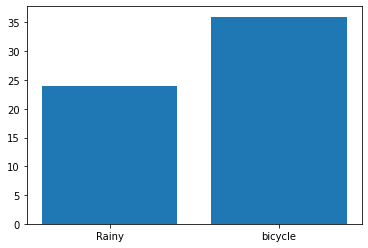

time: 174 ms (started: 2021-04-27 15:18:54 +00:00)


In [10]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [11]:
# Split data into traning and testing

time: 960 µs (started: 2021-04-27 15:18:54 +00:00)


In [12]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flatten_data,target,test_size=0.3,random_state=109)


time: 257 ms (started: 2021-04-27 15:18:54 +00:00)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':  [1,10,100,1000],'kernel':['linear']},
              {'C':  [1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf =   GridSearchCV(svc,param_grid)

clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 36.7 s (started: 2021-04-27 15:18:54 +00:00)


In [14]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0])

time: 43.8 ms (started: 2021-04-27 15:19:31 +00:00)


In [15]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

time: 3.88 ms (started: 2021-04-27 15:19:31 +00:00)


In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.27 ms (started: 2021-04-27 15:19:31 +00:00)


In [17]:
accuracy_score(y_pred,y_test)

0.9444444444444444

time: 4.95 ms (started: 2021-04-27 15:19:31 +00:00)


In [18]:
confusion_matrix(y_pred,y_test) #evalution 

array([[ 6,  1],
       [ 0, 11]])

time: 5.26 ms (started: 2021-04-27 15:19:31 +00:00)


In [19]:

# Save model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 16.5 ms (started: 2021-04-27 15:19:31 +00:00)


In [20]:
model =  pickle.load(open('img_model.p','rb'))

time: 8.54 ms (started: 2021-04-27 15:19:31 +00:00)


In [21]:
y_prob_pred= model.predict_proba(x_test)
y_prob_pred[0]

array([0.00480873, 0.99519127])

time: 47.5 ms (started: 2021-04-27 15:19:31 +00:00)


Enter your URLhttps://rukminim1.flixcart.com/image/612/612/klmmrgw0/cycle/e/6/3/drd-orator-20-cycle-for-kids-semi-assembled-20-20-dolfin-single-original-imagyzv8gesmtt2n.jpeg?q=70
(430, 612, 3)
predicted output:bicycle


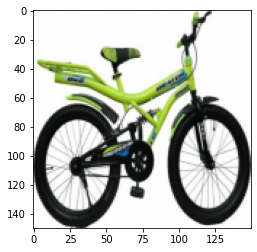

time: 1min 1s (started: 2021-04-25 17:54:56 +00:00)


In [ ]:
flatten_data = []
url =  input("Enter your URL")
img =  imread(url)
img_resize = resize(img,(150,150,3))
flatten_data.append(img_resize.flatten())
flatten_data = np.array(flatten_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flatten_data)
y_out = CATEGORIES[y_out[0]]
print(f'predicted output:{y_out}')


In [22]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.9MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 4.2MB 41.0MB/s 
     |████████████████████████████████| 112kB 53.7MB/s 
     |████████████████████████████████| 163kB 46.3MB/s 
     |████████████████████████████████| 122kB 39.5MB/s 
     |████████████████████████████████| 71kB 4.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
time: 19.2 s (started: 2021-04-27 15:19:31 +00:00)


In [23]:
# Deployment
# 1.WebPage :html,jS,CSS/- flask/django
# 2.WebApp : Sreamlite  
# 3.mobile app - kotlin/java


time: 1.77 ms (started: 2021-04-27 15:19:50 +00:00)


In [24]:
%%writefile app.py
import streamlit as st
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize 
import pickle
from PIL import Image
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from io import BytesIO



def main():
  # model =  pickle.load(open('img_model.p','rb'))
  st.title("WEL-COME TO IMAGE CLASSIFICATION")

  def load_data():
    DATADIR = '/content/drive/MyDrive/ML Internship SmartKnower/ML/Minor Project/images'
    CATEGORIES =['Rainy','bicycle']
    return CATEGORIES
    

  def flat_target_img():
    target=[]
    images = []
    flatten_data =[]

    DATADIR = '/content/drive/MyDrive/ML Internship SmartKnower/ML/Minor Project/images'
    CATEGORIES =['Rainy','bicycle']

    for category in  CATEGORIES:
      # print(category)
      class_num = CATEGORIES.index(category)  # lable encoding the values
      path = os.path.join(DATADIR,category) #create the path to use all the images
      for img in os.listdir(path):
        img_arr =  imread(os.path.join(path,img))
        img_resize = resize(img_arr,(150,150,3)) # Value gets converted 0-1 from 0-255 (Normalization)
        flatten_data.append(np.ndarray.flatten(img_resize))
        images.append(img_resize)
        target.append(class_num)

    flatten_data = np.array(flatten_data)
    target = np.array(target)
    images =np.array(images)
    return flatten_data,target,images


  def split():
    flatten_data,target,images = flat_target_img()
    x_train,x_test,y_train,y_test = train_test_split(flatten_data,target,test_size=0.3,random_state=109)
    return x_train,x_test,y_train,y_test

  def plot_metrics():
    metrics = st.selectbox("What metrics to plot?",("Select the Options","Confusion matrix","ROC","Precision Recall Curve"))
    st.set_option('deprecation.showPyplotGlobalUse', False)
    model =  pickle.load(open('img_model.p','rb'))
    if "Confusion matrix" in metrics:
      st.subheader("Confusion Matrix")
      plot_confusion_matrix(model,x_test,y_test,display_labels=data)
      st.pyplot()
    if "ROC" in metrics:
      final = model.predict_proba(x_test)[:,1]
      fpr,tpr,thresholds=roc_curve(y_test,final,drop_intermediate=True)
      st.subheader("ROC")
     
      plot_roc_curve(model,x_test,y_test,c='orange',linestyle='--')
      st.pyplot()
    if "Precision Recall Curve" in metrics:
      st.subheader("Precision Recall Curve")
      plot_precision_recall_curve(model,x_test,y_test)
      st.pyplot()
          


  def dataAnalysis():
    CATEGORIES = load_data()
    model =  pickle.load(open('img_model.p','rb'))
    flatten_data,target,images = flat_target_img()
    x_train,x_test,y_train,y_test = split()
    st.write("Counts of Images for Using Testing")
    unique,count = np.unique(target,return_counts=True)
    plt.bar(CATEGORIES,count,width=0.4,label='Counts of images') 
    plt.xlabel('COUNTS')
    plt.ylabel('Typs')
    plt.legend()
    st.set_option('deprecation.showPyplotGlobalUse', False)
    st.pyplot()
    # loc = 'left'
    # relative=True
    # width = 0.35
    # if loc == 'left':
    #     n = -0.5
    # elif loc == 'right':
    #     n = 0.5
    # unique, counts = np.unique(flatten_data, return_counts=True)
    # sorted_index = np.argsort(unique)
    # unique = unique[sorted_index]
     
    # if relative:
    #     # plot as a percentage
    #     counts = 100*counts[sorted_index]/len(flatten_data)
    #     ylabel_text = '% count'
    # else:
    #     # plot counts
    #     counts = counts[sorted_index]
    #     ylabel_text = 'count'
         
    # xtemp = np.arange(len(unique))
     
    # plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    # plt.xticks(xtemp, unique, rotation=45)
    # plt.xlabel('equipment type')
    # plt.ylabel(ylabel_text)
 
    # plt.suptitle('relative amount of photos per type')
    # plot_bar(y_train, loc='left')
    # plot_bar(y_test, loc='right')
    # plt.legend([
    #     'train ({0} photos)'.format(len(y_train)), 
    #     'test ({0} photos)'.format(len(y_test))
    # ]);
    
    y_pred = model.predict(x_test)
    accu = accuracy_score(y_pred,y_test)
    accu = accu*100
    accu = float("{:.2f}".format(accu))
    matrix=confusion_matrix(y_pred,y_test)
    report = classification_report(y_pred,y_test)
    st.write(f'Accuracy : {accu}%')
    # st.write(f'Confusion Matrix:{matrix}')
    st.write(f'Classification Report : {report}')

  def predict(data):
    # st.title('Image Classification')
    model =  pickle.load(open('img_model.p','rb'))
    st.text('Upload Image')    
    upload_file = st.file_uploader("choose an image....",type="jpg")
    if upload_file is not None:
      img = Image.open(upload_file)
      st.image(img,caption="uploaded Image")

      if st.button('PRIDICT'):
        
        # CATEGORIES =['Rainy' ,'Winter','bicycle']
        st.write('Result...')
        flatten_data = []
        img = np.array(img)
        img_resize = resize(img,(150,150,3))
        flatten_data.append(img_resize.flatten())
        flatten_data = np.array(flatten_data)
      
        y_out = model.predict(flatten_data)
        y_out = data[y_out[0]]
        st.write(f'predicted output : {y_out.upper()}')
        y_prob_pred = model.predict_proba(flatten_data)
        st.write(f'Probablity : {y_prob_pred}')
        
      
  def prediction_url(data):
    model =  pickle.load(open('img_model.p','rb'))
    flatten_data = []
    url =  st.text_input("Enter your URL")
    img =  imread(url)
    img_resize = resize(img,(150,150,3))
    flatten_data.append(img_resize.flatten())
    flatten_data = np.array(flatten_data)
    print(img.shape)
    plt.imshow(img_resize)
    y_out = model.predict([flatten_data])
    y_out = CATEGORIES[y_out[0]]
    print(f'predicted output:{y_out}')


  data = load_data()
  st.sidebar.title('Select Parameter')
  x_train,x_test,y_train,y_test = split()
  classifier = st.sidebar.selectbox("Classifier",("Select Option","Image Classification","Logistic Regression","Decision Tree","Naive Bayes"))
 

  if classifier == "Logistic Regression":
    st.sidebar.subheader("Parameters: ")
    iterations = st.sidebar.number_input("Iterations",100,1000,step=5,key='iterations')
    C = st.sidebar.number_input("Regularization Factor",0.01,1.0,step=0.01,key='C')
    solver = st.sidebar.radio("Solver",("newton-cg", "lbfgs", "liblinear", "sag", "saga"),key='solver')
    # metrics = st.sidebar.multiselect("What metrics to plot?",("Confusion_matrix","ROC","Precision Recall Curve"))
    if st.sidebar.button("Classify"):
      model = LogisticRegression(max_iter=iterations,solver=solver,C=C)
      model.fit(x_train,y_train)
      ypred = model.predict(x_test)
      st.write("Model Accuracy: ",model.score(x_test,y_test))
      st.write("Model Precision: ", precision_score(y_test,ypred,labels=data))
      matrix=confusion_matrix(ypred,y_test)
      report = classification_report(ypred,y_test)
      # st.write(f'Accuracy : {accu}%')
      # st.write(f'Confusion Matrix:{matrix}')
      st.write(f'Classification Report : {report}')
    ghraph= st.sidebar.checkbox("Ghraps",key=1)
    # if(ghraph):
    #   st.subheader("Ghraph")
    #   plot_metrics(model)
      

  if classifier == "Decision Tree":
    st.sidebar.subheader("Parameters: ")
    max_leaf_nodes = st.sidebar.number_input("Max Leaf Nodes",50,200,step=1,key='max_leaf_nodes')
    criterion = st.sidebar.radio("Criterion",("gini", "entropy"),key='criterion')
    max_features = st.sidebar.radio("Features",("auto", "sqrt", "log2"),key='max_features')
    # metrics = st.sidebar.multiselect("What metrics to plot?",("Confusion_matrix","ROC","Precision Recall Curve"))
    if st.sidebar.button("Classify"):
      model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,criterion=criterion,max_features=max_features)
      model.fit(x_train,y_train)
      ypred = model.predict(x_test)
      st.write("Model Accuracy: ",model.score(x_test,y_test))
      st.write("Model Precision: ", precision_score(y_test,ypred,labels=data))
      matrix=confusion_matrix(ypred,y_test)
      report = classification_report(ypred,y_test)
      # st.write(f'Accuracy : {accu}%')
      # st.write(f'Confusion Matrix:{matrix}')
      st.write(f'Classification Report : {report}')
      # plot_metrics()


  if classifier == "Image Classification":
    option = st.sidebar.selectbox("Perform The Task",("Select the Options","Datasets","Upload Image to Predict","Using Online image url","Ananlysis","Ghraphs"))

    if "Datasets" in option:
      ch = st.sidebar.checkbox("Show Dataset",True,key=1)
      if(ch):
        st.subheader("Types of Category for image classification")
        st.write(data)

    if "Upload Image to Predict" in option:
      predi = st.sidebar.checkbox("Upload the image for prdiction",key=1)
      if(predi):
        st.subheader("Prediction")
        predict(data)
    
    if "Using Online image url" in option:
      predi_url = st.sidebar.checkbox("By Using Online image url for prdiction",key=1)
      if(predi_url):
        st.subheader("Prediction")
        prediction_url(data)

    if "Ananlysis" in option:
      analysis = st.sidebar.checkbox("Show Analysis and Confision Matrix",key=1)
      if(analysis):
        st.subheader("Classification Report")
        dataAnalysis()

   
    if "Ghraph" in option:
      ghraph= st.sidebar.checkbox("Ghraps",key=1)
      if(ghraph):
        st.subheader("Ghraph")
        plot_metrics()
      
  if classifier == "Naive Bayes":
    vect =  TfidfVectorizer()
    x_train = vect.fit_transform(x_train)
    x_test =  vect.transform(x_test)
    metrics = st.sidebar.multiselect("What metrics to plot?",("Confusion_matrix","ROC","Precision Recall Curve"))
    model = MultinomialNB()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    st.write("Model Accuracy: ",model.score(x_test,y_test))
    st.write("Model Precision: ", precision_score(y_test,y_pred,labels=data))
    # plot_metrics()

if __name__ == '__main__':
  main()

Writing app.py
time: 12.9 ms (started: 2021-04-27 15:19:50 +00:00)


In [25]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://51412f86ee78.ngrok.io'

time: 1.4 s (started: 2021-04-27 15:19:50 +00:00)
